### 각 나라별 GDP를 평균 내 정렬하여 상위 10개의 선진국과 하위 10개의 개발도산국을 추출해서 유아 사망률을 비교

1. 모듈 로딩
2. 데이터 준비
3. DF로 저장
4. 전처리 
- 먼저 컬럼 추출
- gdp로 순서를 나열해서 상위10개국 하위10개국선정
  - gdp에 NaN이 존재하는 경우 해당 국가 삭제 >> 선진국, 개발도산국의 데이터를 보기위해서
- 그 다음 각 나라마다 컬럼들을 corr로 비교
5. 시각화
- 시간에 따른 데이터

In [146]:
# 1. 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
# 2. 데이터 준비
f2_name = r'C:\Users\KDP-23\Desktop\KDT\pandas\project\Life Expectancy Data (1).csv'

In [148]:
# 3. csv >>> 데이터 프레임으로 저장
df= pd.read_csv(f2_name)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [149]:
df

Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                              Algeria  2010  Developing   
38                                              Algeria  2009  Developing   
39                                              Algeria  2008  Developing   
40                                              Algeria  2007  Developing   
41                                              Algeria  2006  Developing   
42                                              Algeria  2005  Developing   
43                                              Algeria  2004  Developing   
44                                              Algeria  2003  Developing   
45                                              Algeria  2002  Developing   
46                                              Algeria  2001  Developing   
47                                              Algeria  2000  Developing   
48                                               Angola  2015  Developing   
49                                               Angola  2014  Developing   
50                                               Angola  2013  Developing   
51                                          

#### 유아 사망률과 관련있다 판단한 칼럼 정보:  
- Year: 데이터 기록 연도  
- Status: 국가가 개발된 상태인지 개발 중인지 여부  >>> 이것도 빼자 > why? GDP와 비슷한 개념이라 생각
- Life expectancy: 출생시 평균 기대수명  
- Infant deaths: 인구 1000명당 영아 사망 수  
- Percentage expenditure: GDP 대비 보건 지출 비율  
- Hepatitis B: 1세 어린이 중 B형 간염 예방접종률 (%)  
- Under-five deaths: 인구 1000명당 5세 미만 사망 수  
- Polio: 1세 어린이 중 소아마비 예방접종률 (%)  
- Total expenditure: 정부의 총 예산 중 보건 지출 비율 (%)  
- HIV/AIDS: 0-4세 사이 HIV/AIDS 사망률 (1000명당 생명)  
- GDP: 국내 총생산(GDP) per capita  
- Population: 국가 인구  
- Schooling: 평균 교육 연수  

In [150]:
# 컬럼 추출 >>> DF으로 따로 저장
df.columns = df.columns.str.strip()
columns = [
    'Country', 'Year', 'Life expectancy', 'infant deaths', 'percentage expenditure',
    'Hepatitis B', 'under-five deaths', 'Polio', 'Total expenditure', 'HIV/AIDS',
    'GDP', 'Population', 'Schooling']
df2 = df[columns]

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Life expectancy         2928 non-null   float64
 3   infant deaths           2938 non-null   int64  
 4   percentage expenditure  2938 non-null   float64
 5   Hepatitis B             2385 non-null   float64
 6   under-five deaths       2938 non-null   int64  
 7   Polio                   2919 non-null   float64
 8   Total expenditure       2712 non-null   float64
 9   HIV/AIDS                2938 non-null   float64
 10  GDP                     2490 non-null   float64
 11  Population              2286 non-null   float64
 12  Schooling               2775 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 298.5+ KB


In [152]:
# GDP에 NaN 값이 존재 >> NaN값이 있는 국가는 drop으로 빼고 나머지 국가로 GDP상위 10개국, 하위 10개국 차출

In [153]:
# Country로 set_index
df2.set_index('Country', inplace=True)

# ''GDP' 값에 NaN이 있는 'Country'를 식별하고 해당 국가의 모든 행 제거
nan_gdp = df2[df2['GDP'].isna()].index.unique()
df2 = df2.drop(nan_gdp)

# 나머지 국가의 평균 GDP 계산
gdp = df2.groupby('Country')['GDP'].mean()

# 평균 GDP를 내림차순으로 정렬
gdp_sort = gdp.sort_values(ascending=False)
gdp_sort

Country
Switzerland                 57362.874601
Luxembourg                  53257.012741
Qatar                       40748.444104
Netherlands                 34964.719797
Australia                   34637.565047
Ireland                     33835.272005
Austria                     33827.476309
Denmark                     33067.407916
Singapore                   32790.105907
Kuwait                      31914.378339
Iceland                     30159.502907
Canada                      29382.907523
Sweden                      29334.990639
Norway                      27434.946928
France                      26465.551381
Finland                     25268.649758
Japan                       24892.544784
Germany                     24337.749100
United Arab Emirates        22110.366986
Italy                       21234.782371
Brunei Darussalam           19744.808102
Israel                      18860.476016
Spain                       17093.459737
Belgium                     16915.306000
Greece  

In [154]:
# 상위 10개 및 하위 10개 국가 선택
top10 = gdp_sort.head(10).index.tolist()
bottom10 = gdp_sort.tail(11).index.tolist()

# 밑에서 확인했는데 나루라는 나라가 2013년 데이터 밖에 없어 부정확한 정보라 보고 tail을 11로 수정 후 나루 삭제
bottom10.remove('Nauru')
top10, bottom10

(['Switzerland',
  'Luxembourg',
  'Qatar',
  'Netherlands',
  'Australia',
  'Ireland',
  'Austria',
  'Denmark',
  'Singapore',
  'Kuwait'],
 ['Madagascar',
  'Rwanda',
  'Guinea',
  'Senegal',
  'Sierra Leone',
  'Ethiopia',
  'Niger',
  'Liberia',
  'Malawi',
  'Burundi'])

상위 10개국 >>
'스위스', '럭스부르', '카타르', '네덜란드','호주',
'아일랜드','오스트리아', '덴마크','싱가포르', '쿠웨이트'

하위 10개국
'마다가스카르', '르완다','기니', '세네갈','시에라리온'
'에티오피아', '니제르', '리베리아', '말라위', '부룬디'

In [155]:
# 상위 10개 및 하위 10개 국가의 데이터프레임 생성
top10_df = df2.loc[top10]
bottom10_df = df2.loc[bottom10]

# 결과 데이터프레임 출력
top10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Switzerland to Kuwait
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             106 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       150 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              112 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [156]:
bottom10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Madagascar to Burundi
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             108 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       150 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              160 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [157]:
# 결측치를 나라별로 컬럼을 평균을 내어 NaN을 채운다
# 함수 기능 : 각 나라별로 NaN 값을 해당 나라의 평균 값으로 채우는 함수
# 함수 이름 : fillna_mean()
# 매개 변수 : 해당 df
def fillna_mean(df):
    df_filled = df.groupby(level=0,group_keys=False).apply(lambda group: group.fillna(group.mean()))
    df_filled = df_filled.fillna(df_filled.mean())
    return df_filled
# 1. df.groupby(level=0)는 데이터프레임을 인덱스 레벨 0(즉, 'Country')를 기준으로 그룹화, 나라별로 데이터를 그룹화
# 2. 각 그룹(나라)에 대해 fillna(group.mean())를 적용합니다. 나라의 평균 값으로 NaN 값을 채우는 작업을 수행합니다.
# 마지막으로 전체 데이터프레임의 평균 값을 사용하여 남아 있는 NaN 값을 채웁니다.

In [158]:
# 함수 적용
top10_df_filled = fillna_mean(top10_df)
bottom10_df_filled = fillna_mean(bottom10_df)

# 결측치 확인
top10_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Switzerland to Kuwait
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             160 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       160 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              160 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [159]:
bottom10_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Madagascar to Burundi
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             160 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       160 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              160 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [160]:
top10_df_filled
# 행 전체 보기
pd.options.display.max_rows = None
top10_df_filled

Year  Life expectancy  infant deaths  percentage expenditure  \
Country                                                                     
Switzerland  2015             83.4              0                0.000000   
Switzerland  2014             83.2              0            19479.911610   
Switzerland  2013             83.0              0            19099.045060   
Switzerland  2012             82.7              0            18379.329740   
Switzerland  2011             82.6              0            18822.867320   
Switzerland  2010             82.3              0             2198.590865   
Switzerland  2009             82.1              0            14714.825880   
Switzerland  2008             82.0              0             2084.255535   
Switzerland  2007             81.7              0            11892.334290   
Switzerland  2006             81.5              0            10598.081870   
Switzerland  2005             81.1              0            10055.349810   
Switzerland  2004             81.0              0             9495.540576   
Switzerland  2003             85.0              0              842.276809   
Switzerland  2002             84.0              0             6853.628494   
Switzerland  2001             82.0              0             6478.346135   
Switzerland  2000             79.7              0             5834.582046   
Luxembourg   2015             82.0              0                0.000000   
Luxembourg   2014             81.7              0            16255.161980   
Luxembourg   2013             81.4              0            15515.752340   
Luxembourg   2012             81.1              0             2284.582150   
Luxembourg   2011             88.0              0            17028.527980   
Luxembourg   2010             86.0              0             2267.252192   
Luxembourg   2009             83.0              0             2052.393076   
Luxembourg   2008             80.0              0            18961.348600   
Luxembourg   2007             79.7              0              267.051312   
Luxembourg   2006             79.4              0            15345.490700   
Luxembourg   2005             78.8              0             1346.246697   
Luxembourg   2004             78.7              0            12372.051880   
Luxembourg   2003             78.6              0            10111.389280   
Luxembourg   2002             78.3              0              910.506278   
Luxembourg   2001             78.0              0             7877.336560   
Luxembourg   2000             77.8              0             8246.130437   
Qatar        2015             78.2              0                0.000000   
Qatar        2014             78.1              0             5063.513104   
Qatar        2013             77.9              0              515.073479   
Qatar        2012             77.8              0             5163.329180   
Qatar        2011             77.5              0             4409.170670   
Qatar        2010             77.3              0               37.768488   
Qatar        2009             77.0              0             3688.694288   
Qatar        2008             76.8              0             5484.143308   
Qatar        2007             76.7              0               44.185063   
Qatar        2006             76.6              0              448.595299   
Qatar        2005             76.6              0             4582.476081   
Qatar        2004             76.6              0             4064.743869   
Qatar        2003             76.5              0             4049.972347   
Qatar        2002             76.4              0              188.678294   
Qatar        2001             76.3              0              170.049454   
Qatar        2000             76.2              0             1559.287158   
Netherlands  2015             81.9              1                0.000000   
Netherlands  2014             81.7              1             1491.703605   
Netherlan

In [161]:
bottom10_df_filled
pd.options.display.max_rows = None
bottom10_df_filled

Year  Life expectancy  infant deaths  percentage expenditure  \
Country                                                                      
Madagascar    2015             65.5             28                0.000000   
Madagascar    2014             65.1             29                5.339066   
Madagascar    2013             64.7             29               79.508825   
Madagascar    2012             64.3             30               59.979145   
Madagascar    2011             63.8             31               78.799672   
Madagascar    2010             63.3             32               76.604422   
Madagascar    2009             62.8             33               71.166012   
Madagascar    2008             62.3             34                6.448763   
Madagascar    2007             61.9             35               55.430345   
Madagascar    2006             61.4             36               38.418704   
Madagascar    2005             69.0             37               33.747862   
Madagascar    2004             64.0             38               23.727963   
Madagascar    2003             59.9             40               37.128948   
Madagascar    2002             59.3             41               47.526214   
Madagascar    2001             58.7             42               42.563316   
Madagascar    2000             57.9             44               35.661251   
Rwanda        2015             66.1             11                0.000000   
Rwanda        2014             65.7             12                7.549797   
Rwanda        2013             65.2             12               11.710907   
Rwanda        2012             64.6             13                9.774676   
Rwanda        2011             63.8             14                9.074569   
Rwanda        2010             62.8             16               63.787236   
Rwanda        2009             61.0             17                9.165615   
Rwanda        2008             68.0             18                0.661540   
Rwanda        2007             59.6             20                7.409772   
Rwanda        2006             57.6             22               78.470202   
Rwanda        2005             55.3             24               39.446667   
Rwanda        2004             53.4             26               31.935662   
Rwanda        2003             52.0             29               33.302861   
Rwanda        2002             57.0             31                1.965978   
Rwanda        2001             48.6             33                0.388254   
Rwanda        2000             48.3             34               18.417918   
Guinea        2015             59.0             26                0.000000   
Guinea        2014             58.1             27               50.579765   
Guinea        2013             58.8             27                5.140669   
Guinea        2012             58.4             28                4.344931   
Guinea        2011             58.1             28               42.254790   
Guinea        2010             57.8             29               29.747340   
Guinea        2009             57.3             29               24.847636   
Guinea        2008             56.8             30               19.685103   
Guinea        2007             56.4             31                1.399627   
Guinea        2006             55.6             31               10.383934   
Guinea        2005             54.7             32                1.099666   
Guinea        2004             54.0             33               18.930113   
Guinea        2003             53.3             34                2.395241   
Guinea        2002             52.9             35               21.337818   
Guinea        2001             52.5             36               19.897909   
Guinea        2000             52.5             37                2.215986   
Senegal       2015             66.7             19                0.000000   
Senegal       2014             66.4 

지금 뭐를 분석하고 어떻게 시각화 할것인가??
1. x축을 시간으로 해서 시간에 따른 유아사망을 그래프로 그릴것이냐
2. 각 나라를 2000~2015년도의 평균을 내서 다른 값과 이리저리 확인할 것인가 

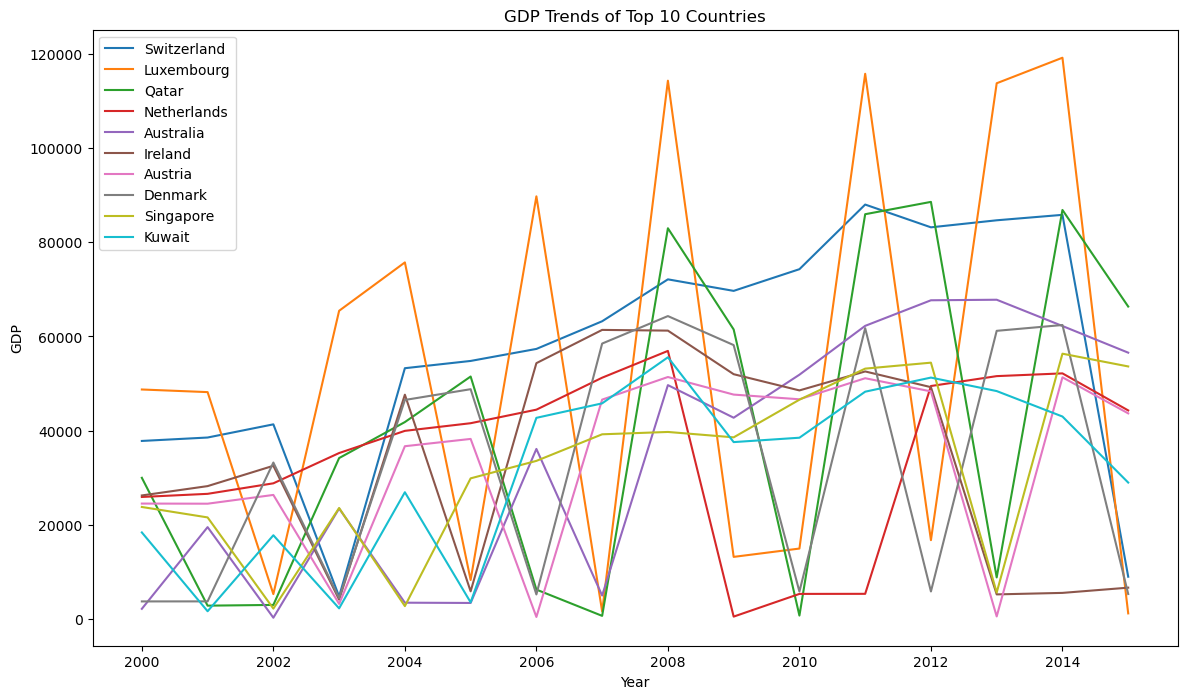

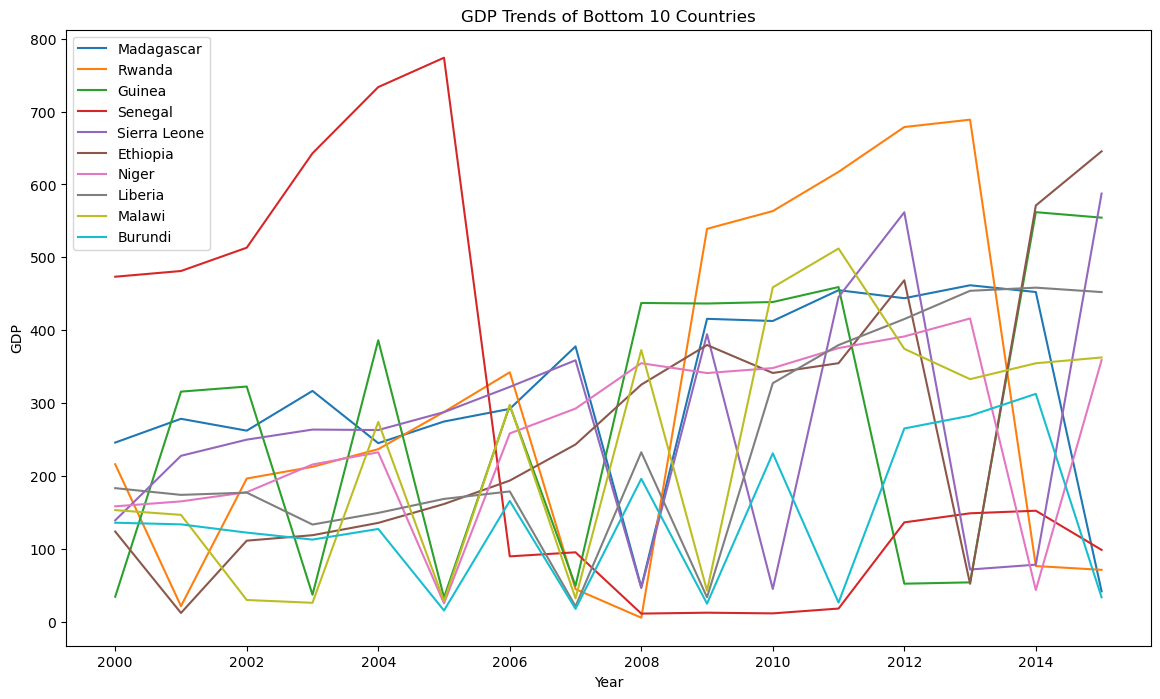

Correlation matrix for Switzerland:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.324678            NaN   
Life expectancy         0.324678         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.414522        -0.060274            NaN   
Hepatitis B                  NaN              NaN            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                   0.696136         0.381586            NaN   
Total expenditure       0.603445         0.031839            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.475433        -0.211776            NaN   
Population              0.216291        -0.076715            NaN   
Schooling               0.914034         0.322991            NaN   

                        percentage expenditure  Hepatitis B  \
Year            

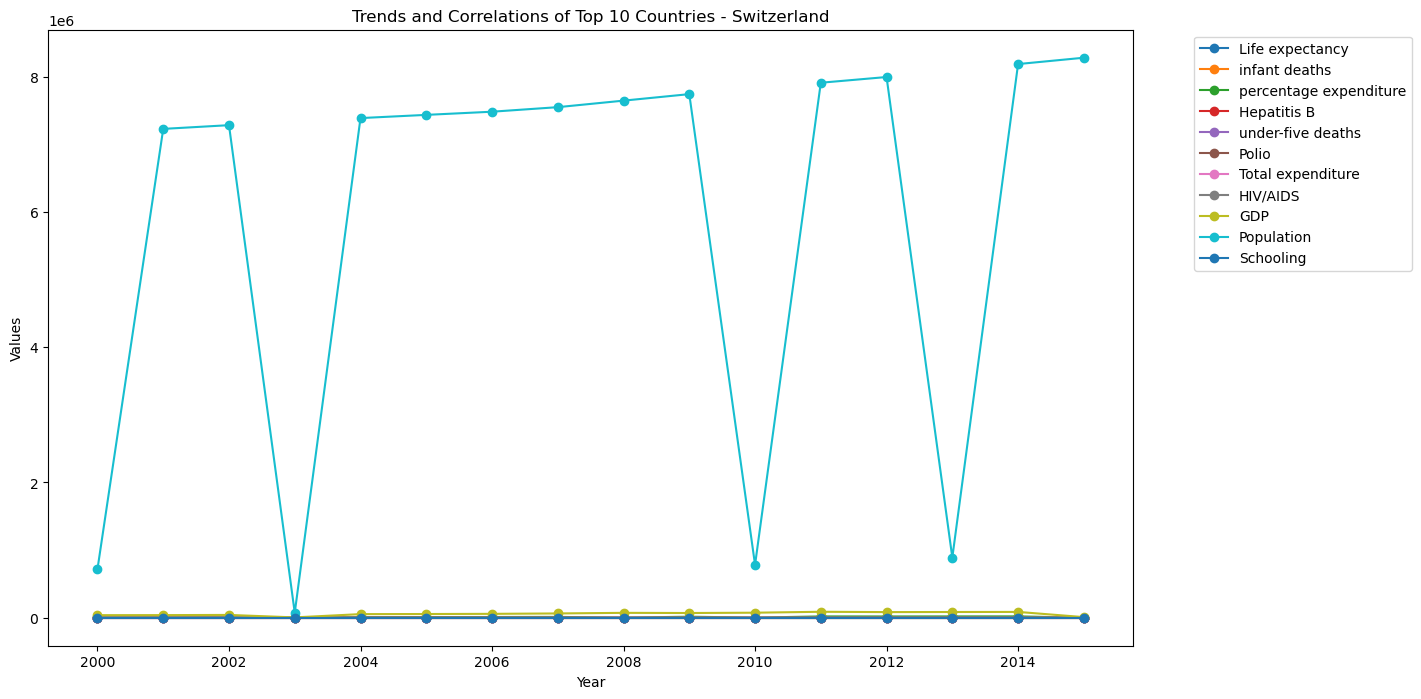

Correlation matrix for Luxembourg:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.674649            NaN   
Life expectancy         0.674649         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.092249         0.096062            NaN   
Hepatitis B             0.493421         0.380717            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                  -0.219382        -0.613368            NaN   
Total expenditure      -0.447762        -0.179489            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.176685         0.152366            NaN   
Population             -0.031850         0.110609            NaN   
Schooling               0.849814         0.621579            NaN   

                        percentage expenditure  Hepatitis B  \
Year             

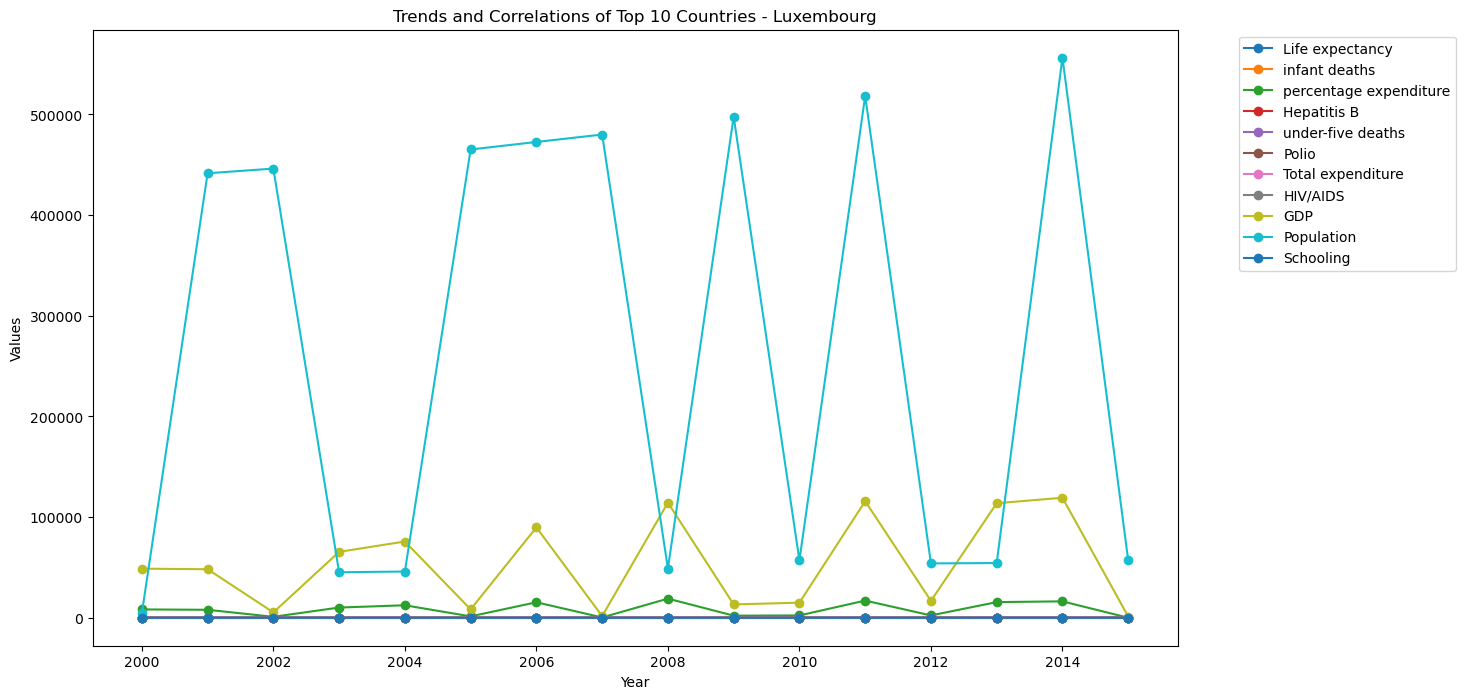

Correlation matrix for Qatar:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.965774            NaN   
Life expectancy         0.965774         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.152491         0.128416            NaN   
Hepatitis B             0.156708         0.039677            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                   0.559342         0.459754            NaN   
Total expenditure      -0.408727        -0.372884            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.505896         0.503732            NaN   
Population                   NaN              NaN            NaN   
Schooling               0.125038         0.225812            NaN   

                        percentage expenditure  Hepatitis B  \
Year                  

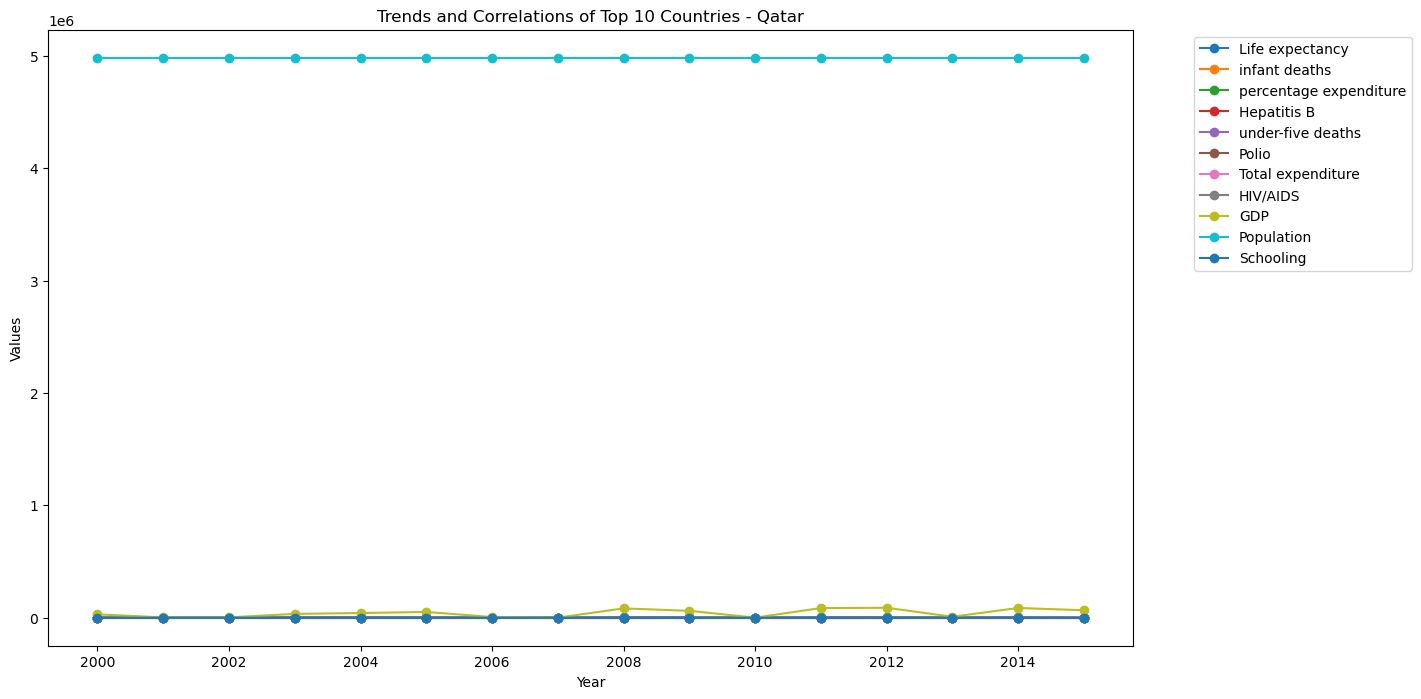

Correlation matrix for Netherlands:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.585384            NaN   
Life expectancy         0.585384         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure -0.398868        -0.229602            NaN   
Hepatitis B             0.163178         0.065235            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                  -0.476095        -0.109258            NaN   
Total expenditure      -0.271809        -0.557711            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.169148        -0.346656            NaN   
Population             -0.097219         0.066202            NaN   
Schooling               0.841339         0.257358            NaN   

                        percentage expenditure  Hepatitis B  \
Year            

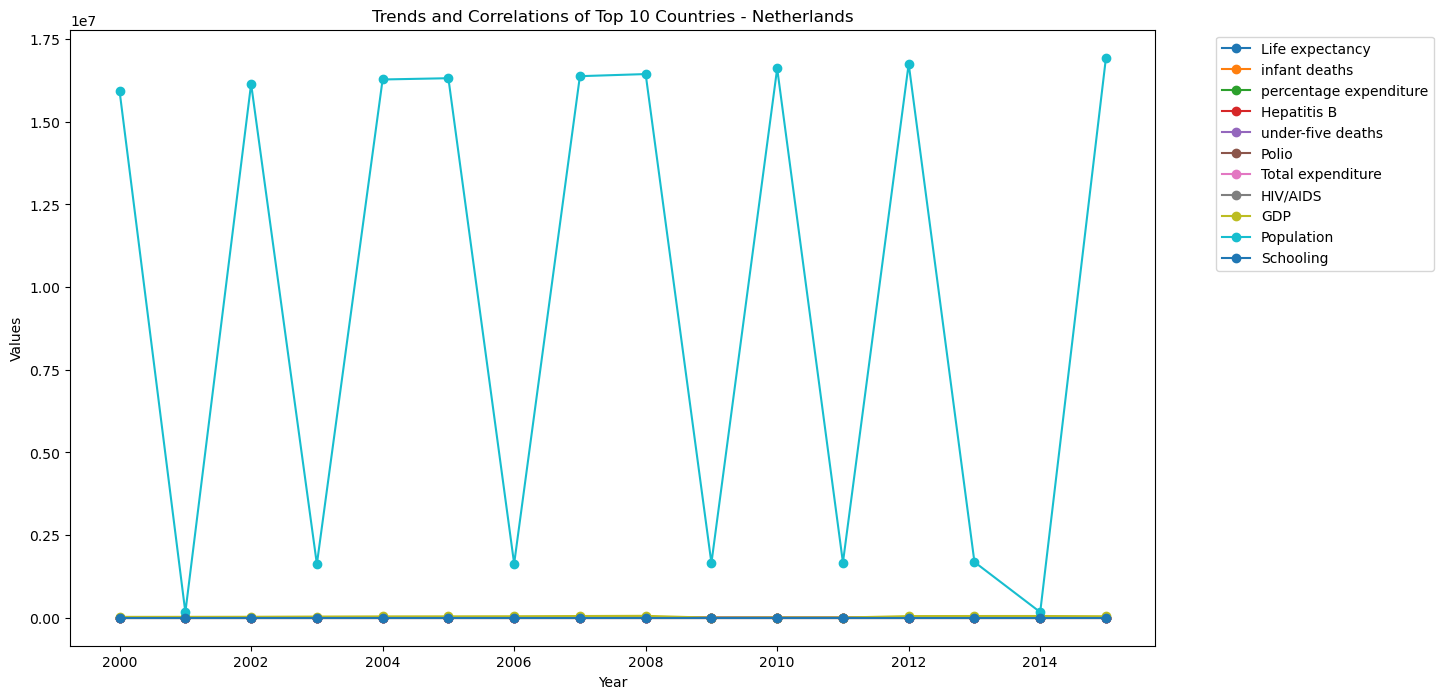

Correlation matrix for Australia:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.391218            NaN   
Life expectancy         0.391218         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.631922         0.153811            NaN   
Hepatitis B            -0.745331        -0.120621            NaN   
under-five deaths      -0.672134        -0.697924            NaN   
Polio                   0.426066         0.404581            NaN   
Total expenditure       0.762723         0.228381            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.867226         0.246419            NaN   
Population              0.638836         0.244062            NaN   
Schooling              -0.216317         0.241139            NaN   

                        percentage expenditure  Hepatitis B  \
Year              

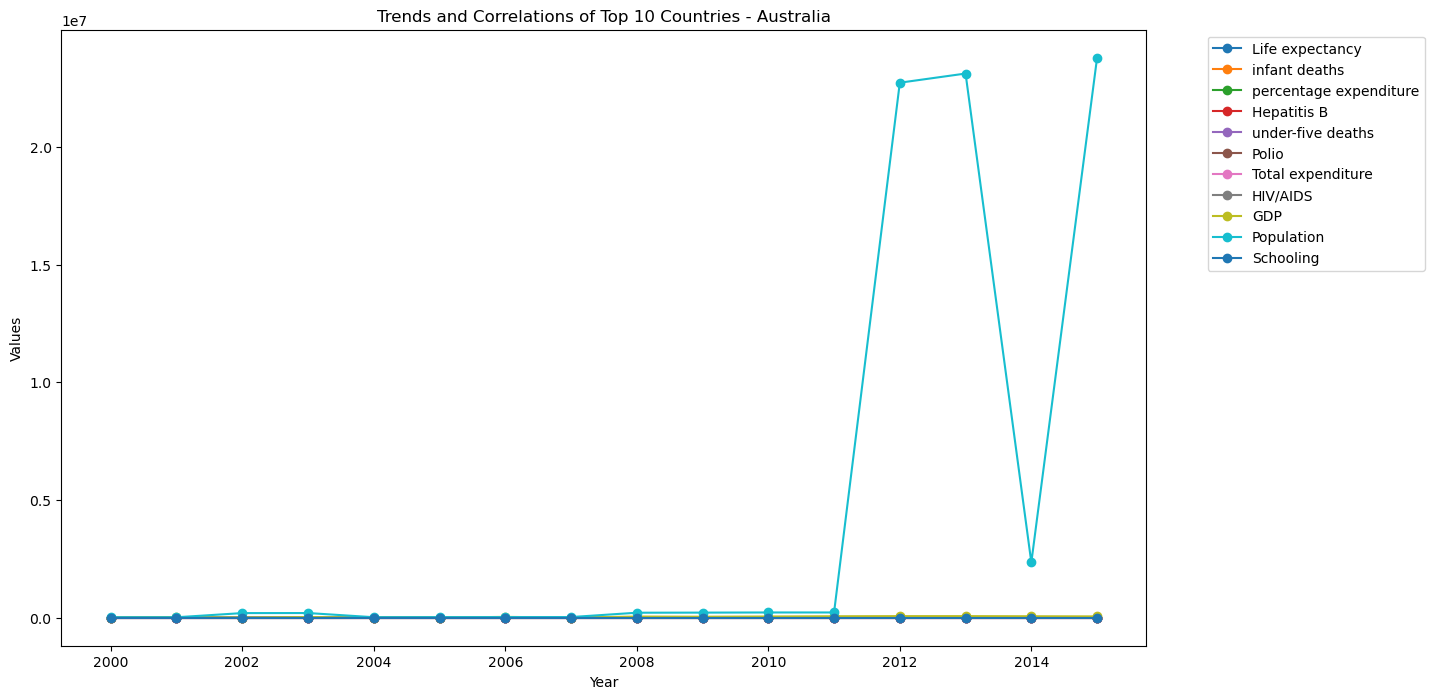

Correlation matrix for Ireland:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.770739            NaN   
Life expectancy         0.770739         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure -0.194515         0.009599            NaN   
Hepatitis B             0.148522        -0.290339            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                   0.330315         0.292130            NaN   
Total expenditure       0.658402         0.664336            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                    -0.076488         0.228130            NaN   
Population              0.425150         0.093843            NaN   
Schooling               0.977730         0.815991            NaN   

                        percentage expenditure  Hepatitis B  \
Year                

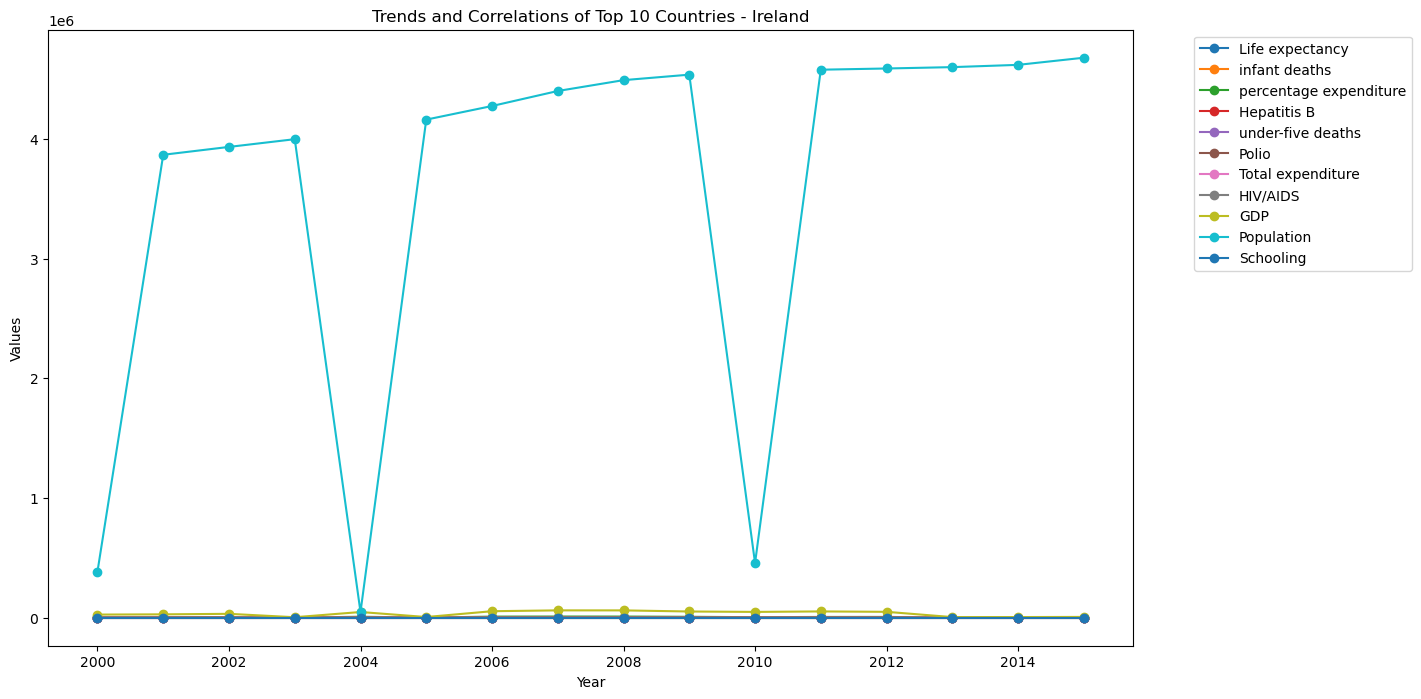

Correlation matrix for Austria:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.653488            NaN   
Life expectancy         0.653488         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.180667         0.560045            NaN   
Hepatitis B             0.752657         0.466224            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                   0.856368         0.448021            NaN   
Total expenditure       0.695690         0.434896            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.395744         0.576511            NaN   
Population              0.559566         0.325777            NaN   
Schooling               0.447460         0.294840            NaN   

                        percentage expenditure  Hepatitis B  \
Year                

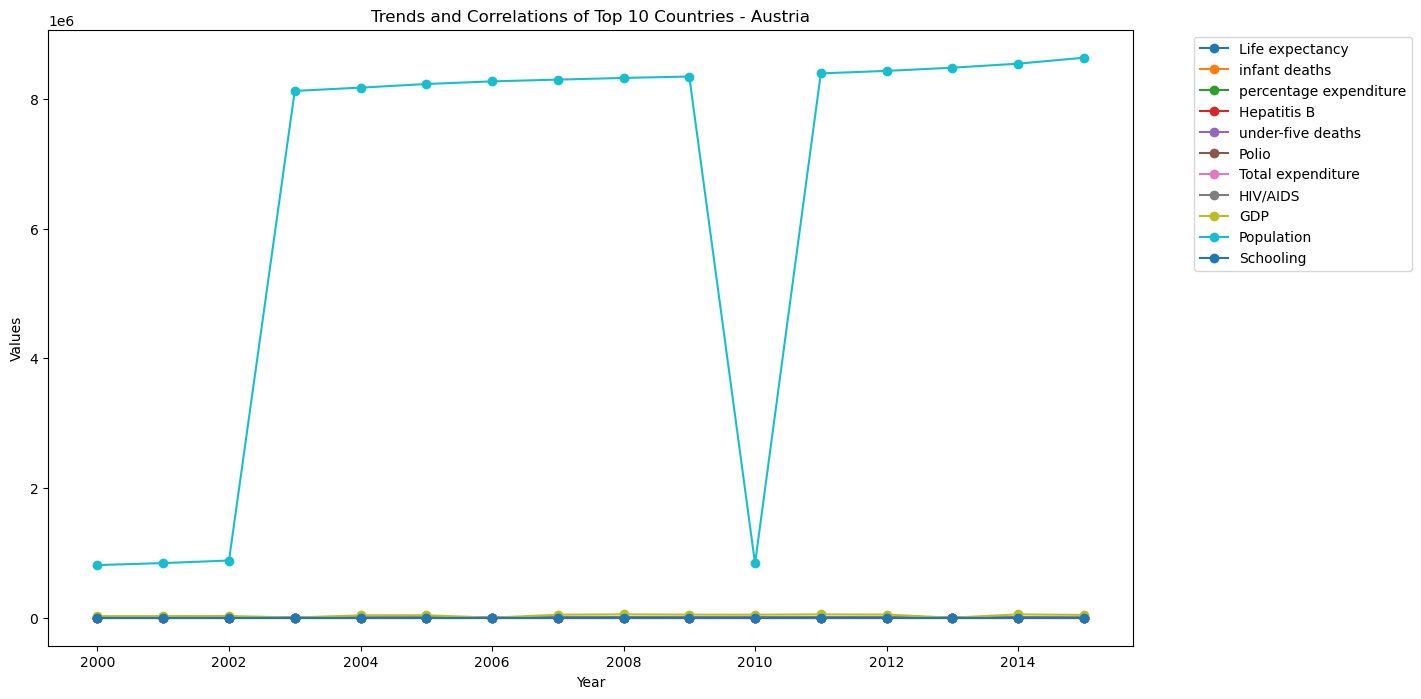

Correlation matrix for Denmark:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.873561            NaN   
Life expectancy         0.873561         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.312335         0.121024            NaN   
Hepatitis B                  NaN              NaN            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                  -0.203727        -0.023072            NaN   
Total expenditure      -0.376302        -0.339612            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.304578         0.131183            NaN   
Population              0.136102         0.240158            NaN   
Schooling               0.845179         0.915324            NaN   

                        percentage expenditure  Hepatitis B  \
Year                

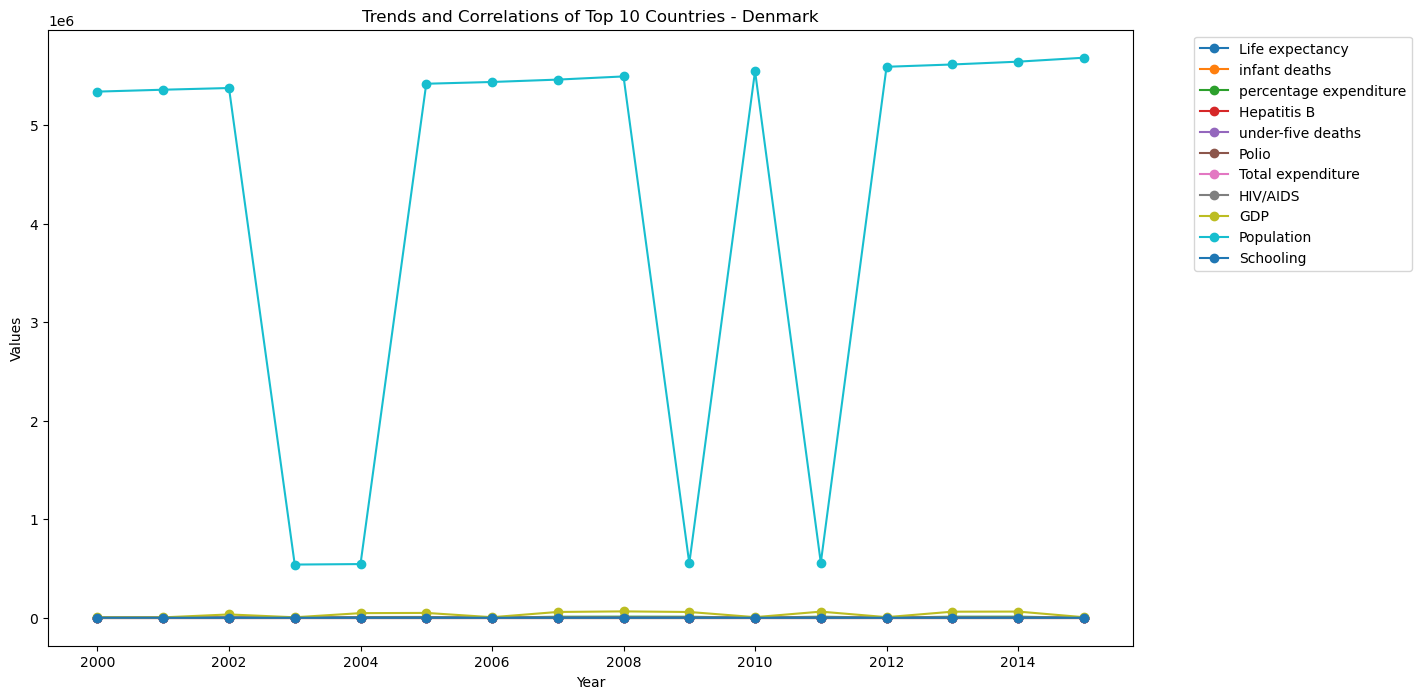

Correlation matrix for Singapore:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.638041            NaN   
Life expectancy         0.638041         1.000000            NaN   
infant deaths                NaN              NaN            NaN   
percentage expenditure  0.340211         0.288954            NaN   
Hepatitis B             0.442996         0.154274            NaN   
under-five deaths            NaN              NaN            NaN   
Polio                   0.259641        -0.010480            NaN   
Total expenditure       0.838094         0.622510            NaN   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.635256         0.481528            NaN   
Population                   NaN              NaN            NaN   
Schooling               0.960729         0.629679            NaN   

                        percentage expenditure  Hepatitis B  \
Year              

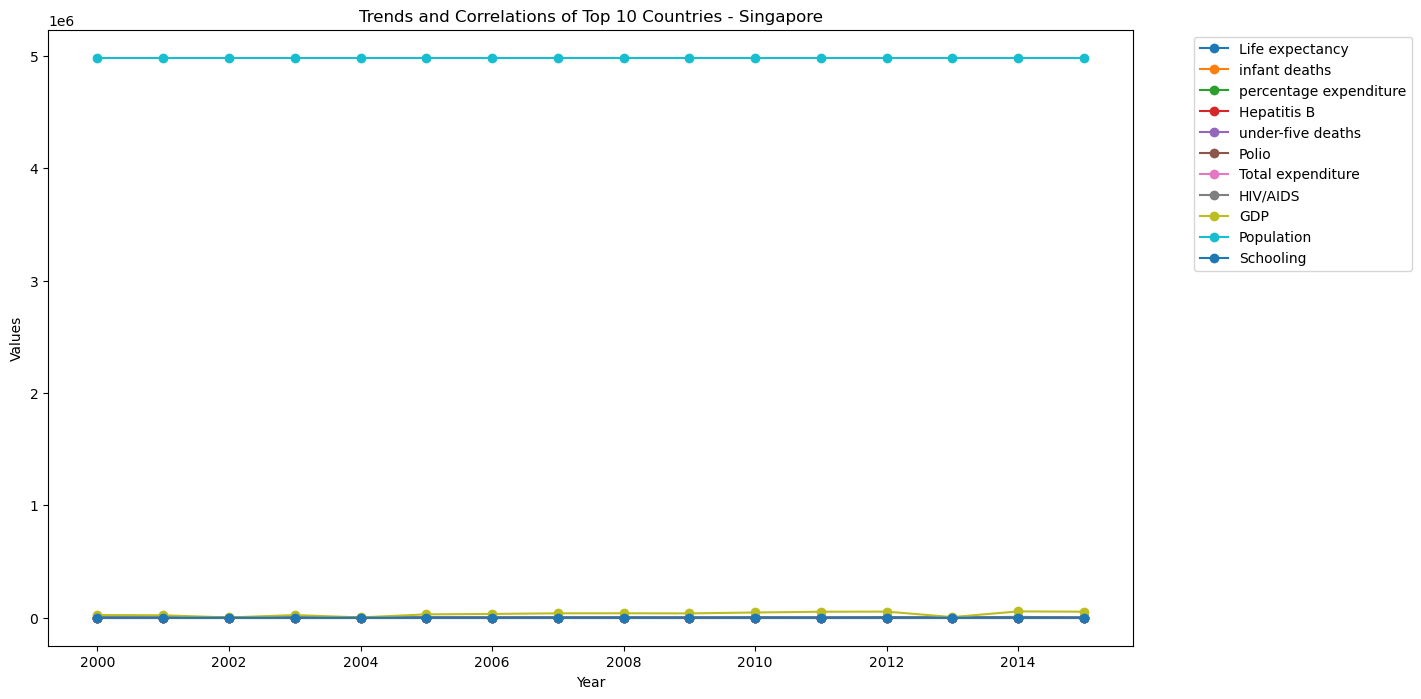

Correlation matrix for Kuwait:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.988145       0.433861   
Life expectancy         0.988145         1.000000       0.325831   
infant deaths           0.433861         0.325831       1.000000   
percentage expenditure  0.481993         0.413186       0.798527   
Hepatitis B             0.200418         0.128610       0.432455   
under-five deaths            NaN              NaN            NaN   
Polio                   0.012488        -0.066523       0.345388   
Total expenditure      -0.118361        -0.086551      -0.405728   
HIV/AIDS                     NaN              NaN            NaN   
GDP                     0.687641         0.624529       0.797722   
Population                   NaN              NaN            NaN   
Schooling              -0.876642        -0.894982      -0.359211   

                        percentage expenditure  Hepatitis B  \
Year                 

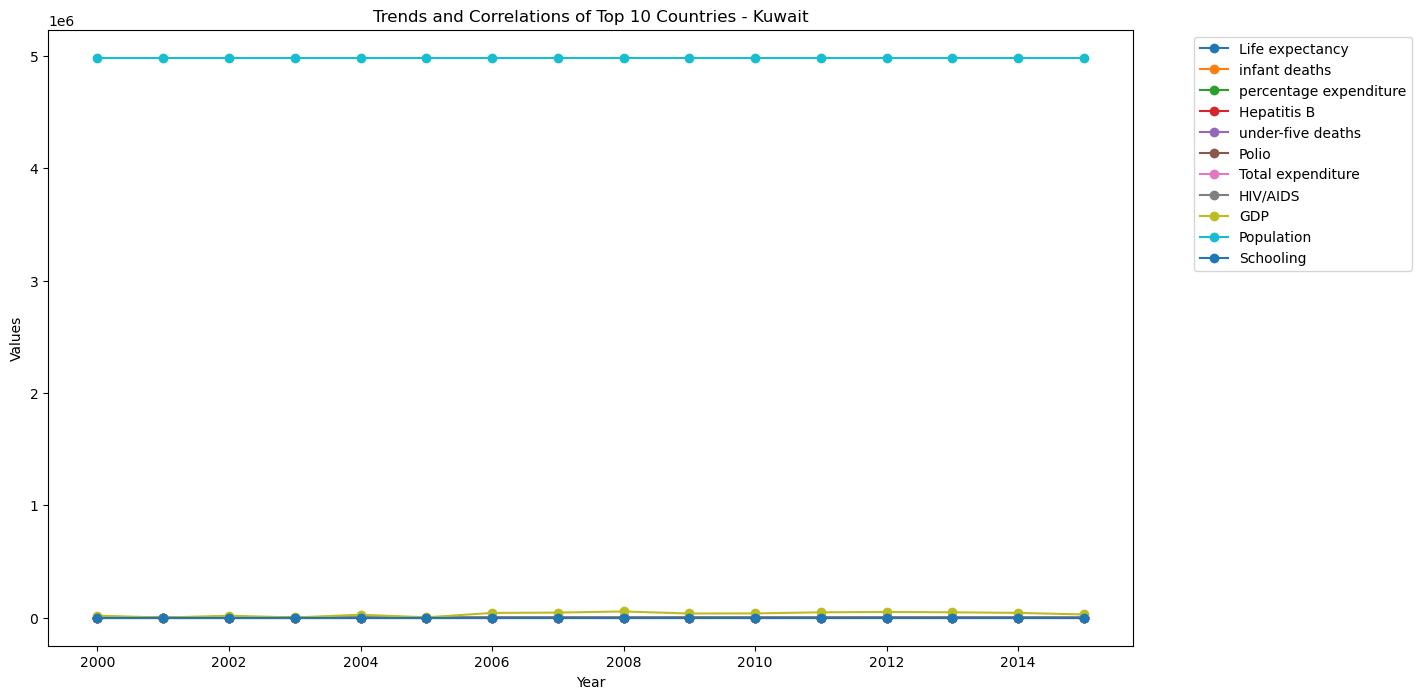

Correlation matrix for Madagascar:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.659621      -0.993367   
Life expectancy         0.659621         1.000000      -0.691751   
infant deaths          -0.993367        -0.691751       1.000000   
percentage expenditure  0.050464        -0.074004      -0.097921   
Hepatitis B            -0.118944         0.070435       0.112692   
under-five deaths      -0.994644        -0.666803       0.998156   
Polio                   0.313515        -0.056965      -0.309651   
Total expenditure      -0.787047        -0.457114       0.784702   
HIV/AIDS               -0.939336        -0.604409       0.909615   
GDP                     0.250837         0.119604      -0.272441   
Population              0.147823         0.209213      -0.186457   
Schooling               0.978933         0.647749      -0.982884   

                        percentage expenditure  Hepatitis B  \
Year             

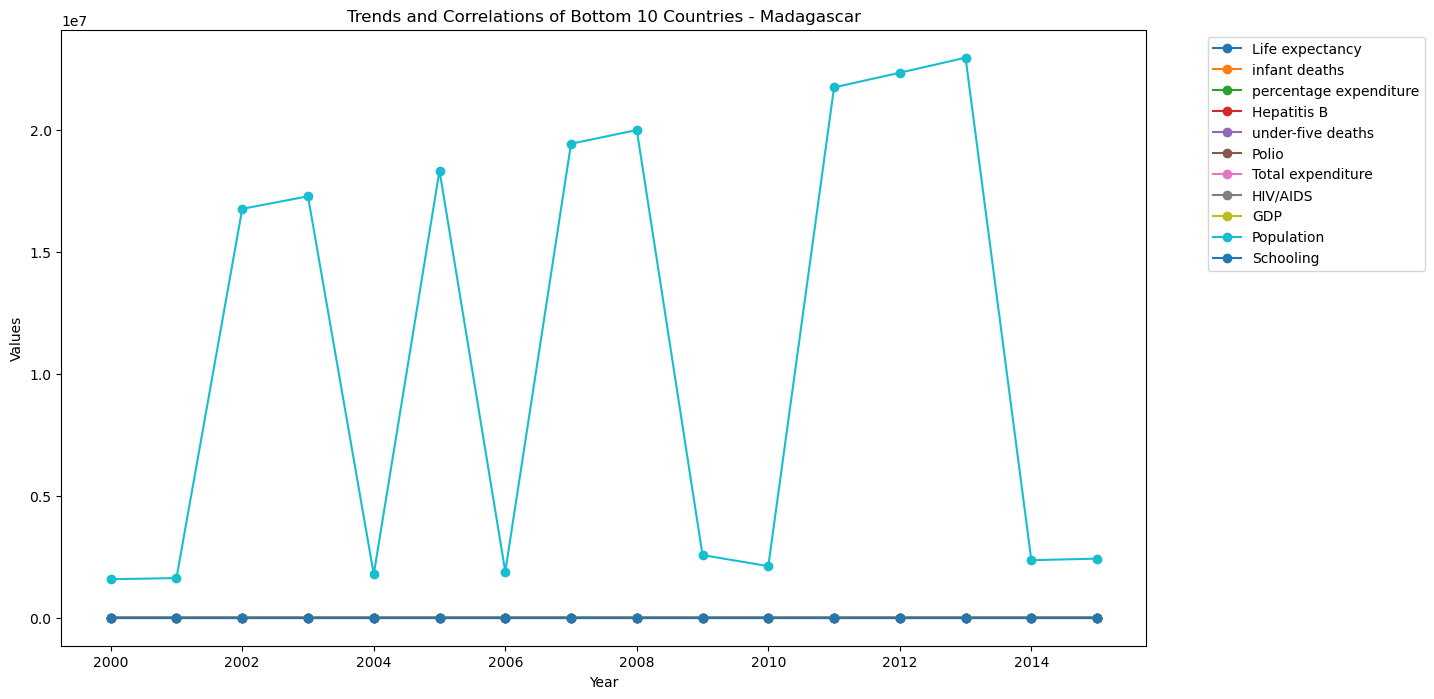

Correlation matrix for Rwanda:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.902973      -0.985066   
Life expectancy         0.902973         1.000000      -0.925637   
infant deaths          -0.985066        -0.925637       1.000000   
percentage expenditure -0.161494        -0.214746       0.103402   
Hepatitis B             0.551365         0.425806      -0.563533   
under-five deaths      -0.983928        -0.923209       0.999157   
Polio                   0.569923         0.604030      -0.605952   
Total expenditure       0.566113         0.565808      -0.599387   
HIV/AIDS               -0.976359        -0.901494       0.966580   
GDP                     0.367410         0.282680      -0.418959   
Population              0.388512         0.211655      -0.337531   
Schooling               0.942589         0.929317      -0.979007   

                        percentage expenditure  Hepatitis B  \
Year                 

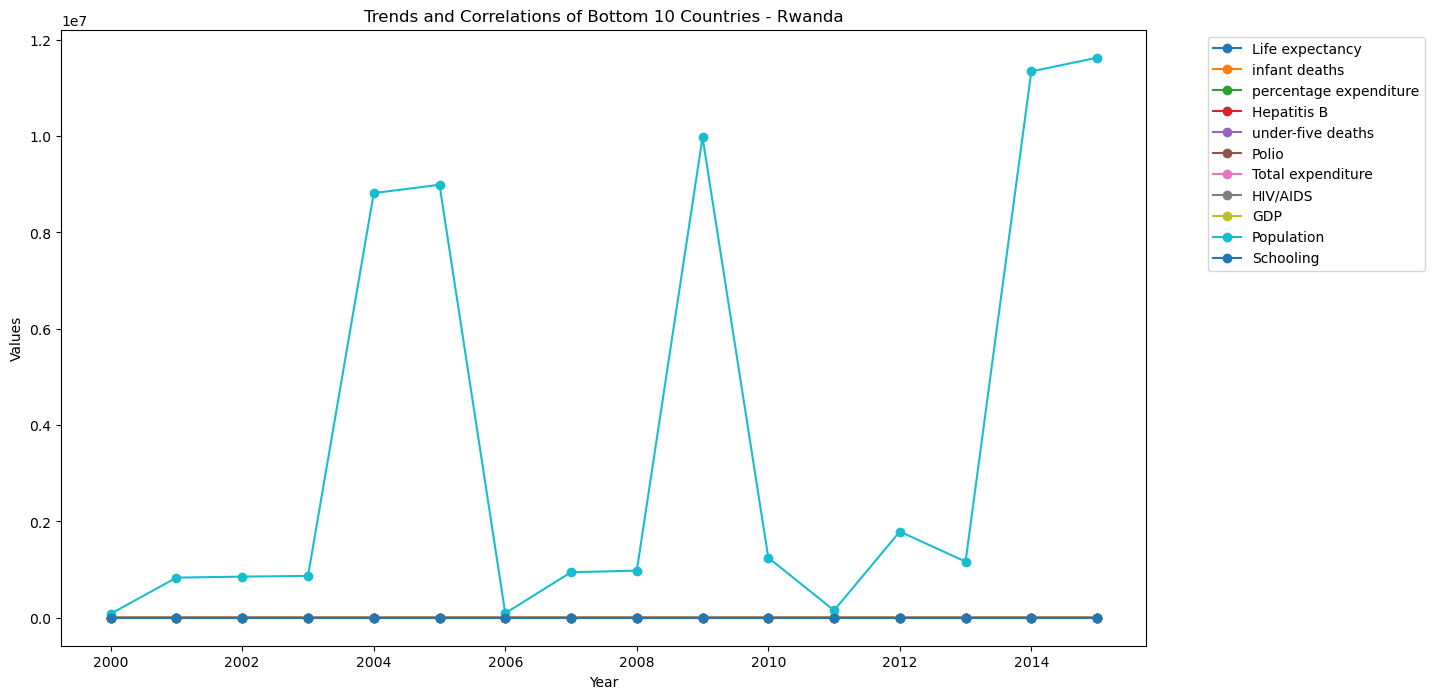

Correlation matrix for Guinea:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.976408      -0.987542   
Life expectancy         0.976408         1.000000      -0.983746   
infant deaths          -0.987542        -0.983746       1.000000   
percentage expenditure  0.260148         0.228275      -0.252948   
Hepatitis B            -0.084185         0.038582       0.047013   
under-five deaths      -0.988813        -0.989634       0.995894   
Polio                  -0.113572        -0.123283       0.123519   
Total expenditure       0.720870         0.678557      -0.645243   
HIV/AIDS               -0.917451        -0.831533       0.862778   
GDP                     0.399447         0.347037      -0.399325   
Population             -0.098952        -0.103712       0.090348   
Schooling               0.950372         0.977893      -0.963767   

                        percentage expenditure  Hepatitis B  \
Year                 

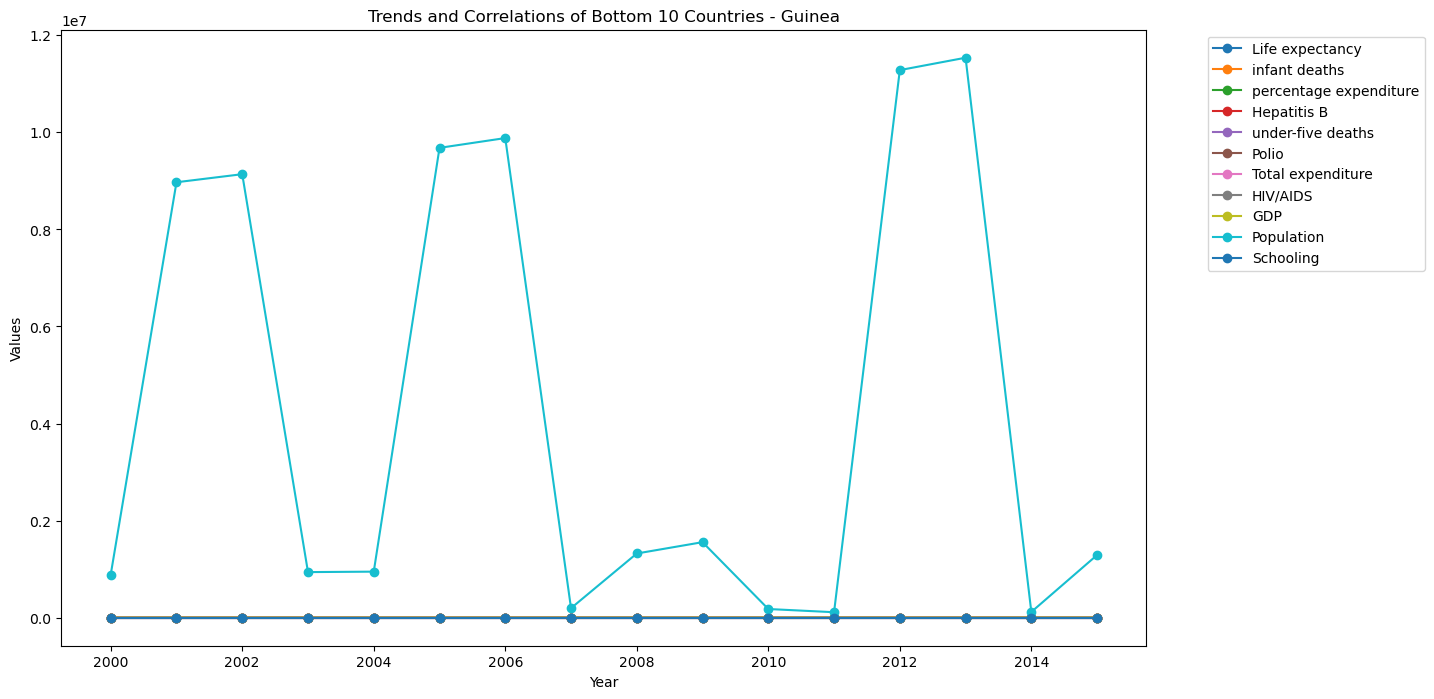

Correlation matrix for Senegal:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.938339      -0.985370   
Life expectancy         0.938339         1.000000      -0.951338   
infant deaths          -0.985370        -0.951338       1.000000   
percentage expenditure -0.434425        -0.230965       0.383692   
Hepatitis B             0.349140         0.346413      -0.332661   
under-five deaths      -0.990034        -0.943569       0.990439   
Polio                   0.605047         0.643664      -0.632661   
Total expenditure      -0.574051        -0.527028       0.539065   
HIV/AIDS               -0.790182        -0.691100       0.708028   
GDP                    -0.696399        -0.557163       0.698623   
Population              0.388945         0.450042      -0.404177   
Schooling               0.994396         0.924600      -0.967804   

                        percentage expenditure  Hepatitis B  \
Year                

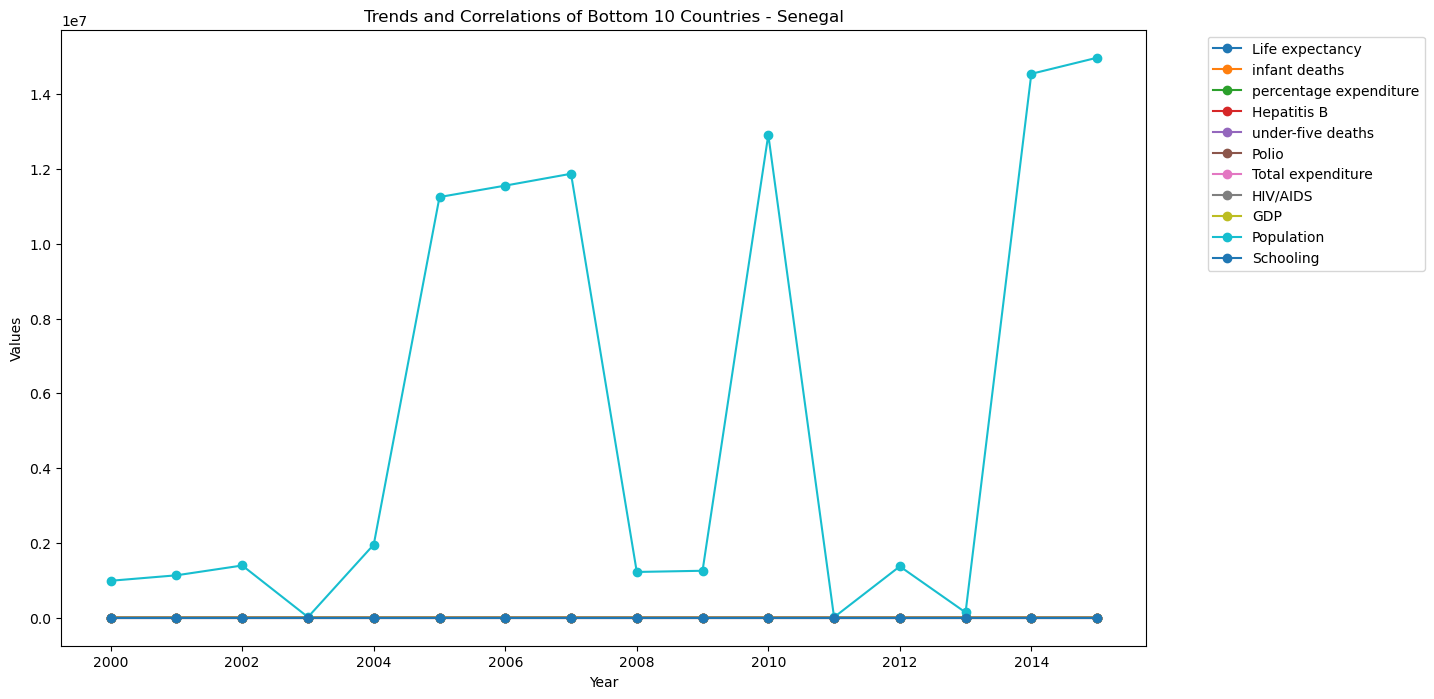

Correlation matrix for Sierra Leone:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.854130      -0.893913   
Life expectancy         0.854130         1.000000      -0.790872   
infant deaths          -0.893913        -0.790872       1.000000   
percentage expenditure -0.361543        -0.307083       0.503252   
Hepatitis B             0.282105         0.364733      -0.424845   
under-five deaths      -0.949710        -0.826503       0.985863   
Polio                   0.911758         0.809954      -0.745391   
Total expenditure      -0.133736        -0.076480      -0.140999   
HIV/AIDS               -0.623012        -0.568952       0.890885   
GDP                     0.223989         0.168886      -0.165918   
Population             -0.619809        -0.557451       0.644861   
Schooling               0.997997         0.855537      -0.876976   

                        percentage expenditure  Hepatitis B  \
Year           

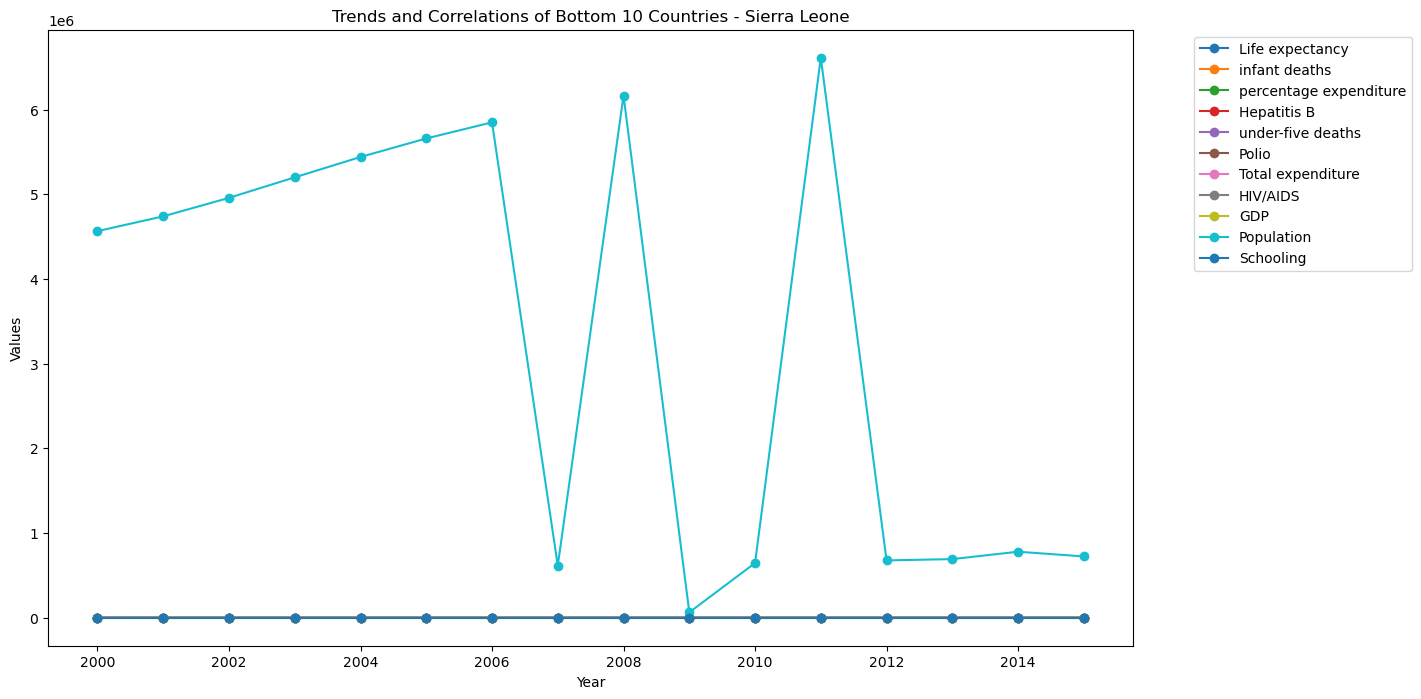

Correlation matrix for Ethiopia:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.917255      -0.991862   
Life expectancy         0.917255         1.000000      -0.936129   
infant deaths          -0.991862        -0.936129       1.000000   
percentage expenditure  0.551797         0.602296      -0.595339   
Hepatitis B             0.416384         0.203446      -0.315061   
under-five deaths      -0.993210        -0.935058       0.999894   
Polio                  -0.196650        -0.142690       0.204736   
Total expenditure       0.517697         0.443854      -0.535101   
HIV/AIDS               -0.994148        -0.934249       0.994525   
GDP                     0.778591         0.744170      -0.765800   
Population              0.154813         0.233159      -0.133133   
Schooling               0.959572         0.952326      -0.985429   

                        percentage expenditure  Hepatitis B  \
Year               

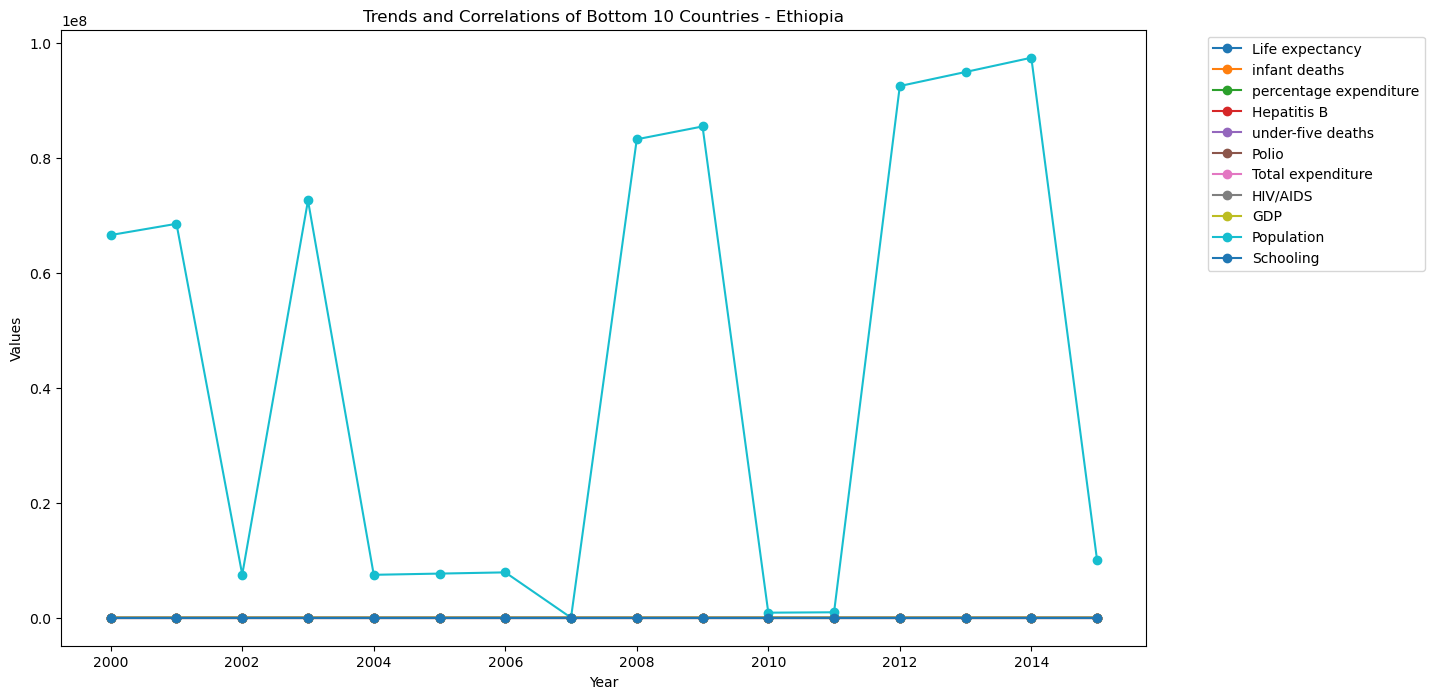

Correlation matrix for Niger:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.863990      -0.981571   
Life expectancy         0.863990         1.000000      -0.868148   
infant deaths          -0.981571        -0.868148       1.000000   
percentage expenditure  0.018346         0.051643      -0.065052   
Hepatitis B             0.089134         0.146272      -0.024266   
under-five deaths      -0.990758        -0.855334       0.995995   
Polio                   0.395063         0.306431      -0.417046   
Total expenditure      -0.342073        -0.416875       0.328497   
HIV/AIDS               -0.939842        -0.869789       0.924335   
GDP                     0.494755         0.529538      -0.570543   
Population              0.600879         0.619173      -0.616610   
Schooling               0.988782         0.903643      -0.978911   

                        percentage expenditure  Hepatitis B  \
Year                  

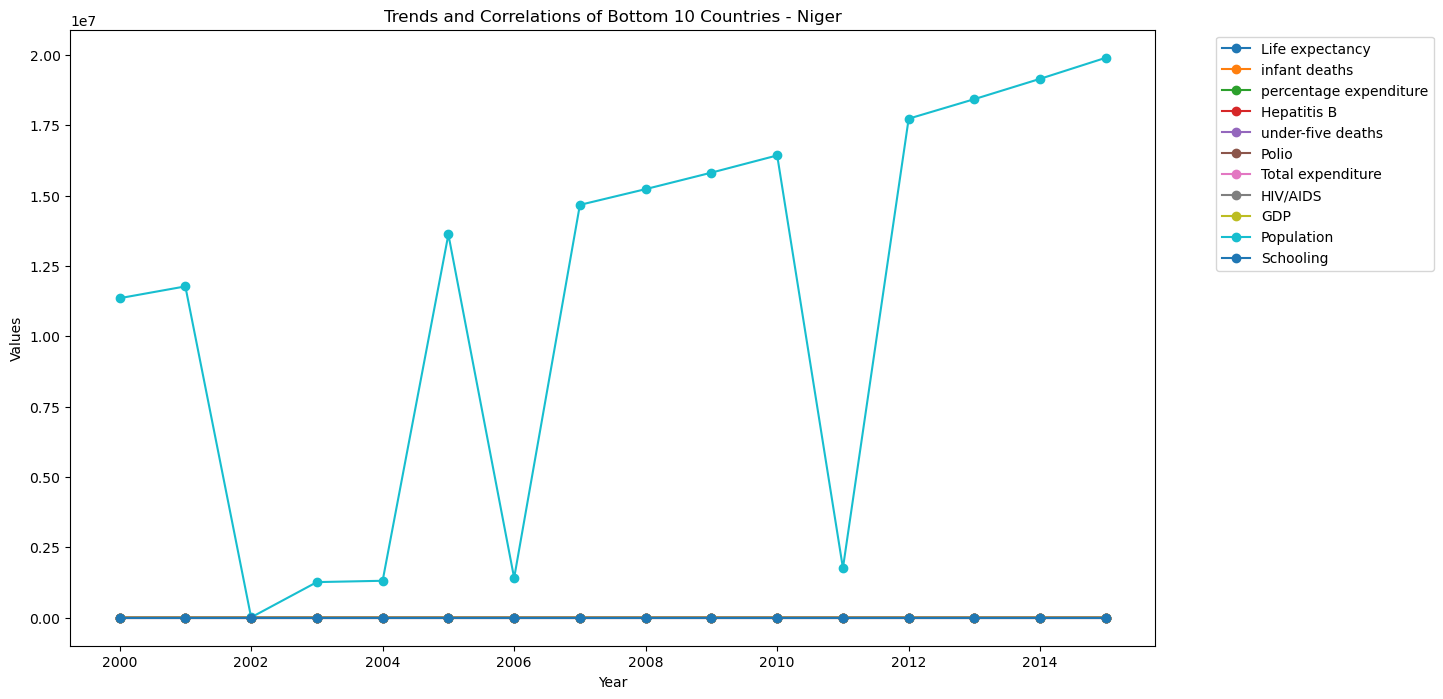

Correlation matrix for Liberia:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.831294      -0.977101   
Life expectancy         0.831294         1.000000      -0.842985   
infant deaths          -0.977101        -0.842985       1.000000   
percentage expenditure  0.508735         0.520161      -0.508783   
Hepatitis B            -0.130894        -0.114920       0.119198   
under-five deaths      -0.980115        -0.843216       0.985775   
Polio                   0.027227        -0.108036      -0.097325   
Total expenditure       0.087873         0.099084      -0.100663   
HIV/AIDS               -0.947003        -0.805493       0.890714   
GDP                     0.735567         0.604373      -0.643986   
Population              0.186307         0.195118      -0.180976   
Schooling              -0.182022        -0.294148       0.215918   

                        percentage expenditure  Hepatitis B  \
Year                

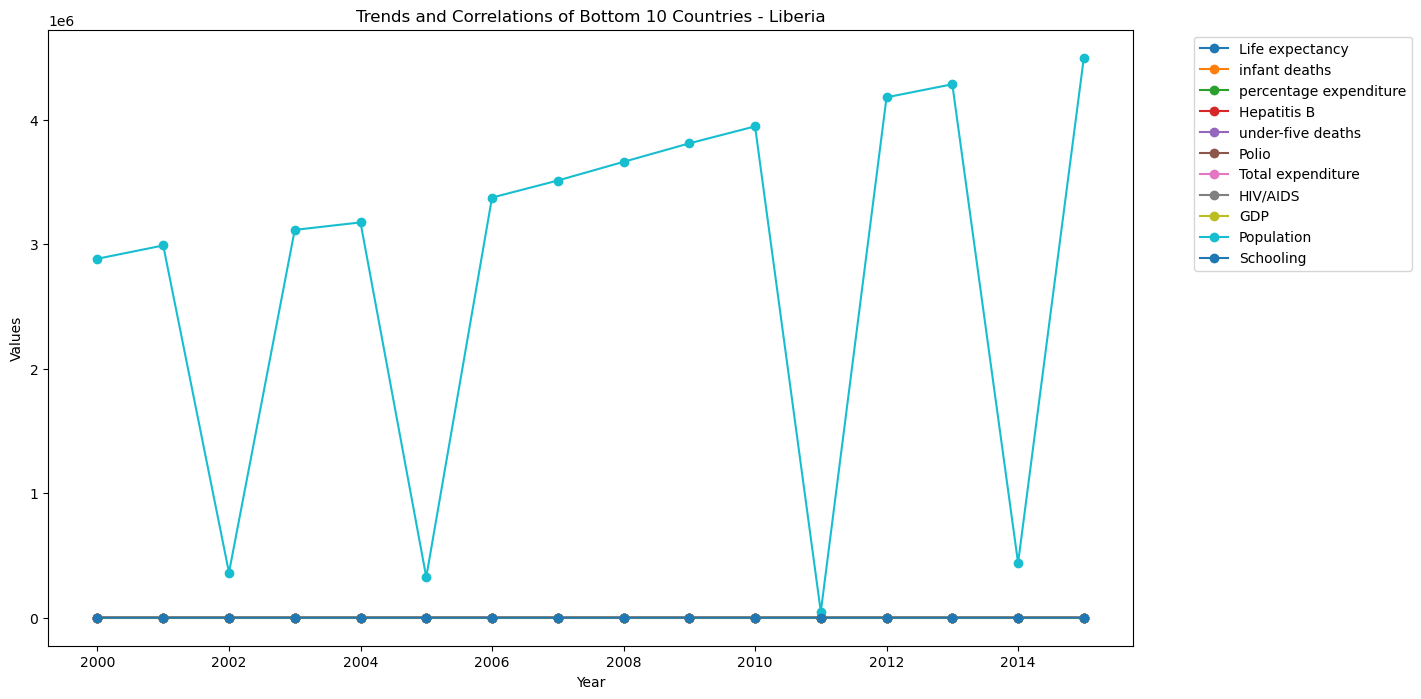

Correlation matrix for Malawi:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.990171      -0.983786   
Life expectancy         0.990171         1.000000      -0.952716   
infant deaths          -0.983786        -0.952716       1.000000   
percentage expenditure  0.353467         0.363221      -0.370248   
Hepatitis B             0.375596         0.353135      -0.383505   
under-five deaths      -0.987532        -0.960259       0.998199   
Polio                   0.423979         0.330405      -0.521660   
Total expenditure       0.113989         0.098043      -0.169861   
HIV/AIDS               -0.980384        -0.996781       0.940512   
GDP                     0.648056         0.667108      -0.616214   
Population             -0.147397        -0.113759       0.158696   
Schooling               0.376449         0.477451      -0.282996   

                        percentage expenditure  Hepatitis B  \
Year                 

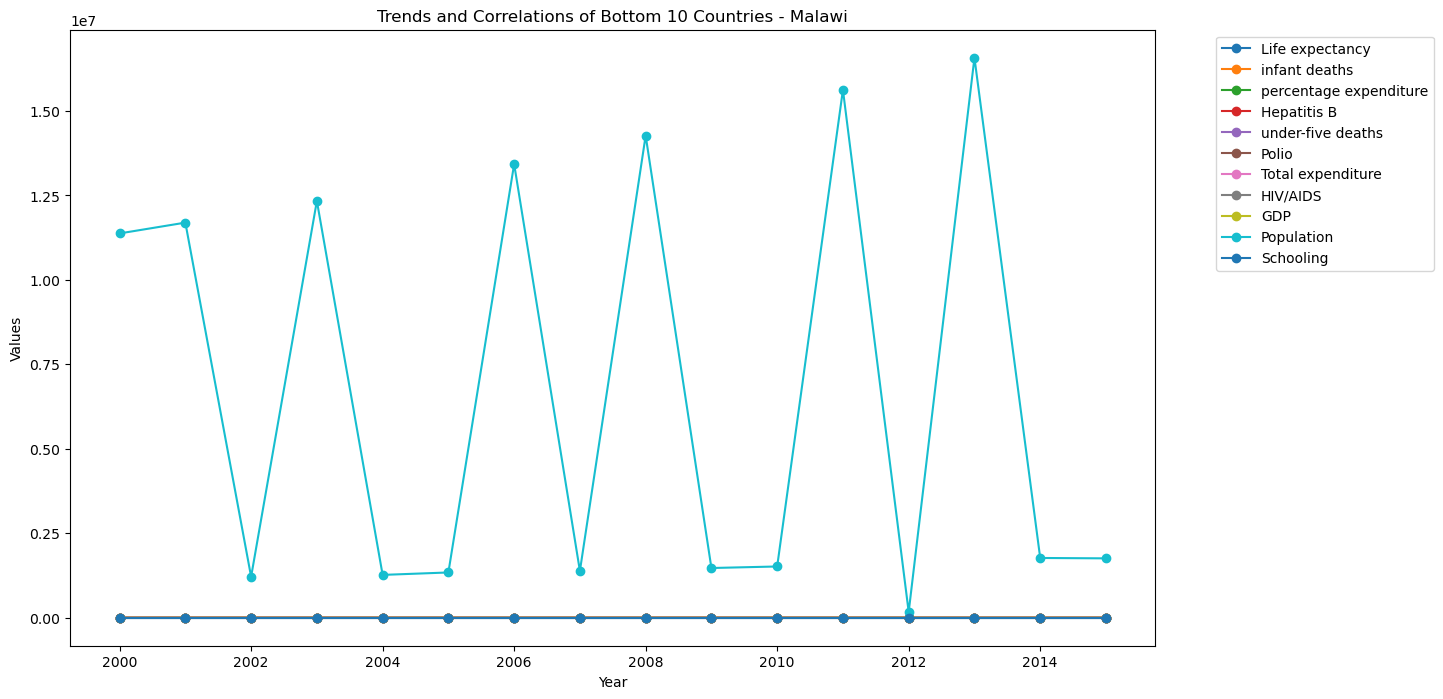

Correlation matrix for Burundi:
                            Year  Life expectancy  infant deaths  \
Year                    1.000000         0.783167      -0.958597   
Life expectancy         0.783167         1.000000      -0.749397   
infant deaths          -0.958597        -0.749397       1.000000   
percentage expenditure  0.443443         0.413210      -0.354873   
Hepatitis B             0.407165         0.462538      -0.347524   
under-five deaths      -0.992548        -0.737842       0.954627   
Polio                   0.917909         0.705040      -0.817257   
Total expenditure       0.366058         0.229177      -0.358037   
HIV/AIDS               -0.986312        -0.843861       0.941040   
GDP                     0.286690         0.306534      -0.230120   
Population             -0.589726        -0.844773       0.616327   
Schooling               0.977695         0.837018      -0.935239   

                        percentage expenditure  Hepatitis B  \
Year                

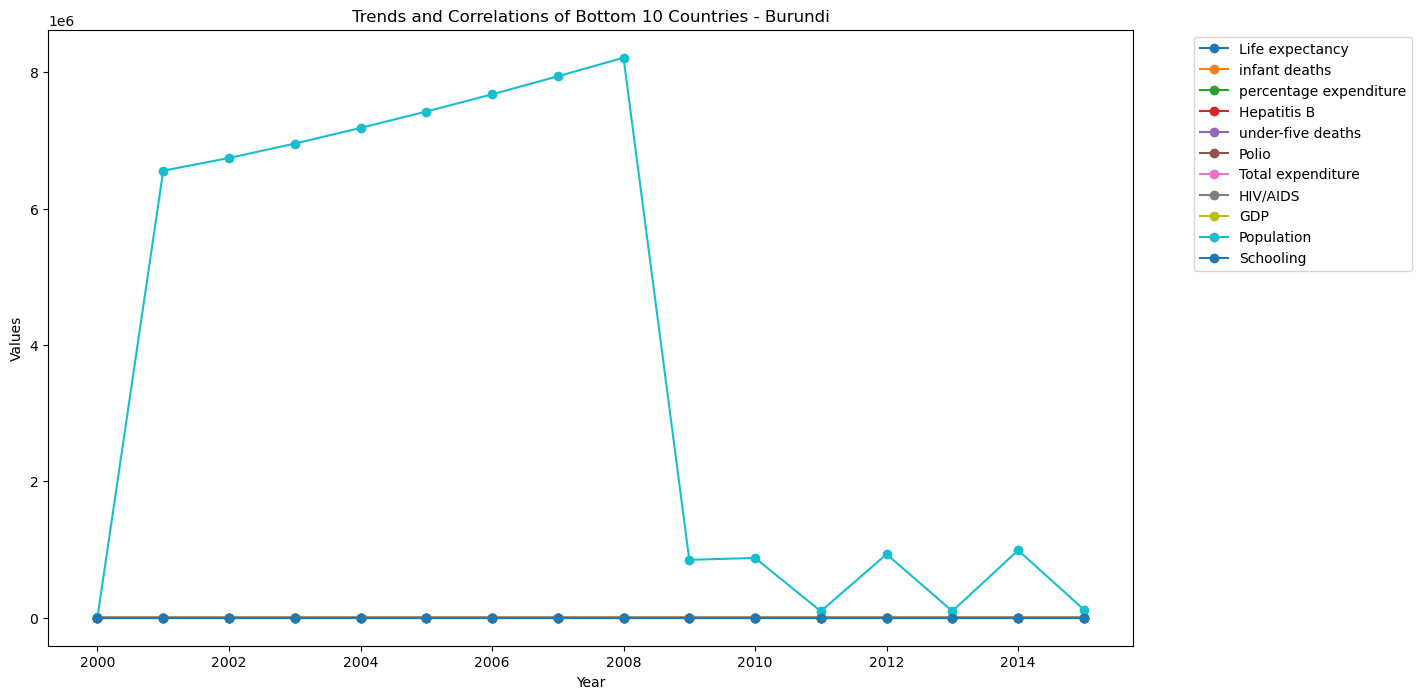

In [162]:
# 각 나라별로 하나씩 추출하여 Year에 따른 변화를 관찰
def plot_country_trends(df, countries, title):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_df = df.loc[country]
        plt.plot(country_df['Year'], country_df['GDP'], label=country)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title(title)
    plt.legend()
    plt.show()

# 상위 10개국의 Year에 따른 GDP 변화
plot_country_trends(top10_df_filled, top10, 'GDP Trends of Top 10 Countries')

# 하위 10개국의 Year에 따른 GDP 변화
plot_country_trends(bottom10_df_filled, bottom10, 'GDP Trends of Bottom 10 Countries')

# 각 나라별로 'Year'에 따른 모든 컬럼들의 상관관계 계산 및 시각화
def plot_country_correlations(df, countries, title):
    for country in countries:
        country_df = df.loc[country]
        corr_matrix = country_df.corr()
        print(f"Correlation matrix for {country}:\n{corr_matrix}\n")
        plt.figure(figsize=(14, 8))
        plt.plot(country_df['Year'], country_df.drop(columns=['Year']), marker='o')
        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title(f'{title} - {country}')
        plt.legend(country_df.columns.drop('Year'), bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

# 상위 10개국의 컬럼별 Year에 따른 상관관계 및 시각화
plot_country_correlations(top10_df_filled, top10, 'Trends and Correlations of Top 10 Countries')

# 하위 10개국의 컬럼별 Year에 따른 상관관계 및 시각화
plot_country_correlations(bottom10_df_filled, bottom10, 'Trends and Correlations of Bottom 10 Countries')